In [1]:
import pandas as pd
import tensorflow as tf
print(tf.__version__)

2.13.0-rc1


In [2]:
ethdata = pd.read_csv("Ethereum Historical Data - Investing.com-2.csv")

In [3]:
ethdata.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"May 21, 2023","1,814.13","1,819.66","1,827.47","1,813.67",146.87K,-0.30%
1,"May 20, 2023","1,819.68","1,812.32","1,828.06","1,807.08",134.46K,0.41%
2,"May 19, 2023","1,812.32","1,800.95","1,829.33","1,796.99",253.50K,0.63%
3,"May 18, 2023","1,800.99","1,822.12","1,831.51","1,774.77",311.24K,-1.14%
4,"May 17, 2023","1,821.73","1,823.98","1,834.44","1,785.78",376.26K,-0.12%


In [4]:
import pandas as pd
from datetime import datetime
ethdata['Date'] = pd.to_datetime(ethdata['Date'], format="%b %d, %Y")
ethdata = ethdata.set_index("Date")
ethdata["Currency"] = "ETH"
numeric_columns = ['Price', 'Open', 'High', 'Low']
ethdata[numeric_columns] = ethdata[numeric_columns].replace(',', '', regex=True).apply(pd.to_numeric)
ethdata["Change %"] = ethdata["Change %"].str.rstrip('%').astype(float)
ethdata["Change %"] = ethdata["Change %"].apply(pd.to_numeric)



In [5]:
ethdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2625 entries, 2023-05-21 to 2016-03-14
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2625 non-null   float64
 1   Open      2625 non-null   float64
 2   High      2625 non-null   float64
 3   Low       2625 non-null   float64
 4   Vol.      2625 non-null   object 
 5   Change %  2625 non-null   float64
 6   Currency  2625 non-null   object 
dtypes: float64(5), object(2)
memory usage: 164.1+ KB


In [6]:
ethdata

,Price,Open,High,Low,Vol.,Change %,Currency
Date,,,,,,,
2023-05-21,1814.13,1819.66,1827.47,1813.67,146.87K,-0.30,ETH
2023-05-20,1819.68,1812.32,1828.06,1807.08,134.46K,0.41,ETH
2023-05-19,1812.32,1800.95,1829.33,1796.99,253.50K,0.63,ETH
2023-05-18,1800.99,1822.12,1831.51,1774.77,311.24K,-1.14,ETH
2023-05-17,1821.73,1823.98,1834.44,1785.78,376.26K,-0.12,ETH
...,...,...,...,...,...,...,...
2016-03-18,10.74,11.09,11.20,8.34,157.37K,0.00,ETH
2016-03-17,10.74,12.58,12.61,10.44,89.45K,-16.61,ETH
2016-03-16,12.88,13.06,13.89,12.62,19.24K,-1.38,ETH


In [7]:
ethdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,2625.0,920.283280,1112.160774,6.70,158.18,334.87,1555.46,4808.38
Open,2625.0,919.617752,1112.178675,6.68,157.96,334.46,1554.57,4808.34
High,2625.0,949.976171,1146.226590,7.32,164.27,346.19,1602.13,4864.06
Low,2625.0,885.450335,1072.752270,5.86,150.64,315.54,1505.37,4715.43
Change %,2625.0,0.330430,5.422580,-44.55,-2.15,0.08,2.77,29.51


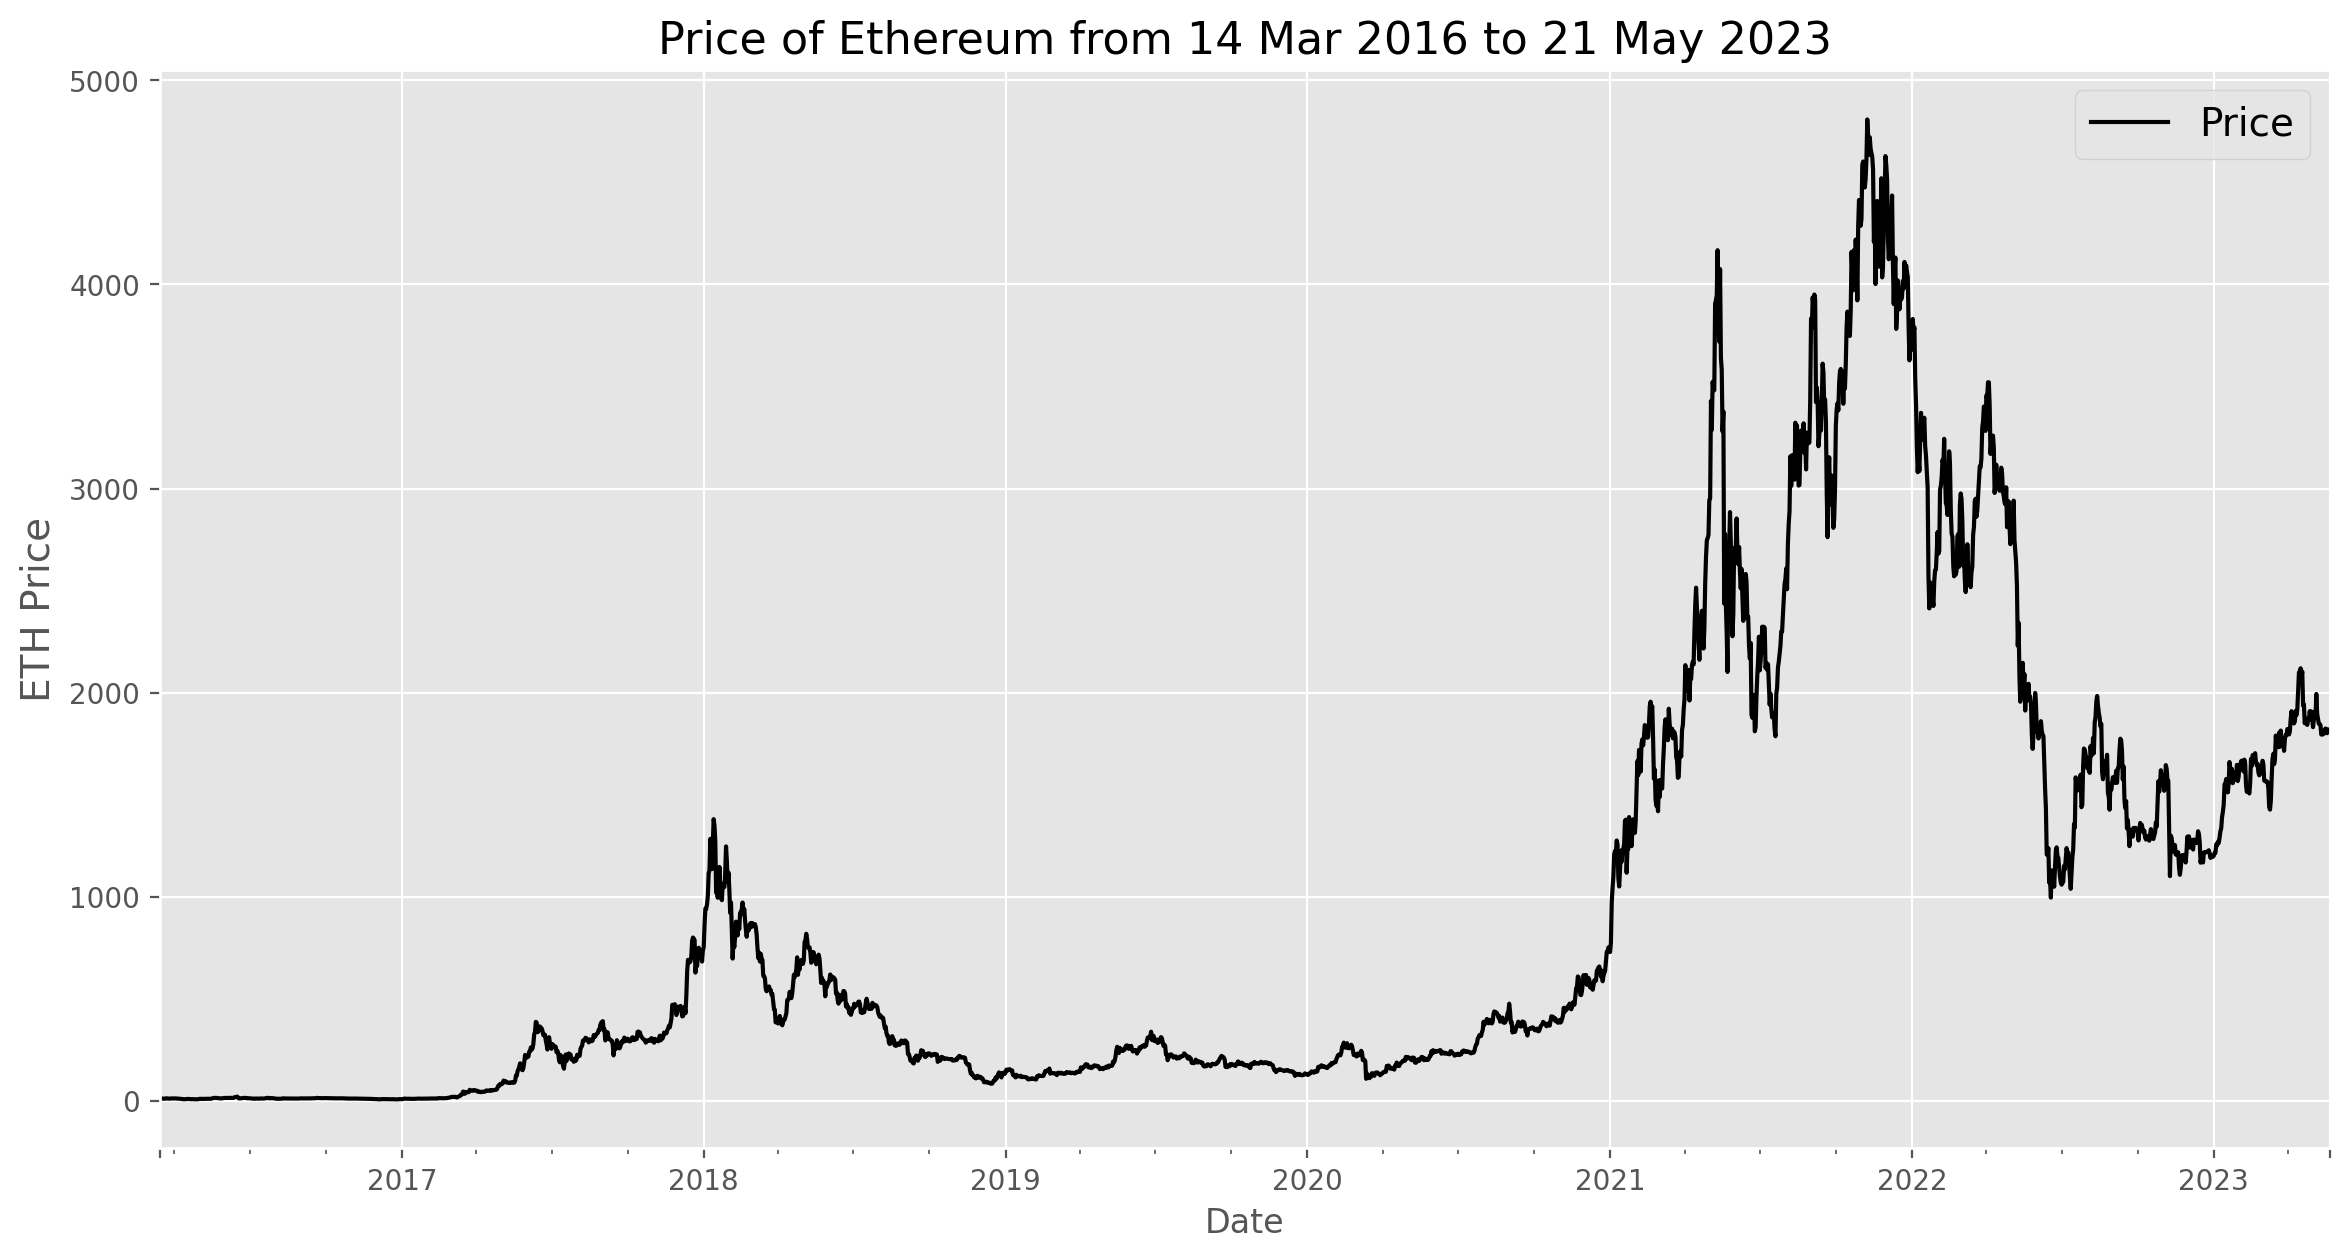

In [8]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(14, 7), dpi=200)

ethdata["Price"].plot(color='black')
plt.grid(True)

plt.ylabel("ETH Price", fontsize=14)
plt.title("Price of Ethereum from 14 Mar 2016 to 21 May 2023", fontsize=16)
plt.legend(fontsize=14)

plt.show()


In [9]:
timesteps = ethdata.index.to_numpy()
prices = ethdata["Price"].to_numpy()

timesteps[:10], prices[:10]


(array(['2023-05-21T00:00:00.000000000', '2023-05-20T00:00:00.000000000',
        '2023-05-19T00:00:00.000000000', '2023-05-18T00:00:00.000000000',
        '2023-05-17T00:00:00.000000000', '2023-05-16T00:00:00.000000000',
        '2023-05-15T00:00:00.000000000', '2023-05-14T00:00:00.000000000',
        '2023-05-13T00:00:00.000000000', '2023-05-12T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([1814.13, 1819.68, 1812.32, 1800.99, 1821.73, 1823.98, 1817.11,
        1799.36, 1794.95, 1807.31]))

In [10]:
split_size = int(0.2*len(prices))

In [11]:
split_size

525

In [12]:
y_test, X_test = prices[:split_size] ,timesteps[:split_size]
y_train, X_train = prices[split_size:], timesteps[split_size:]
len(X_train), len(X_test), len(y_train), len(y_test)


(2100, 525, 2100, 525)

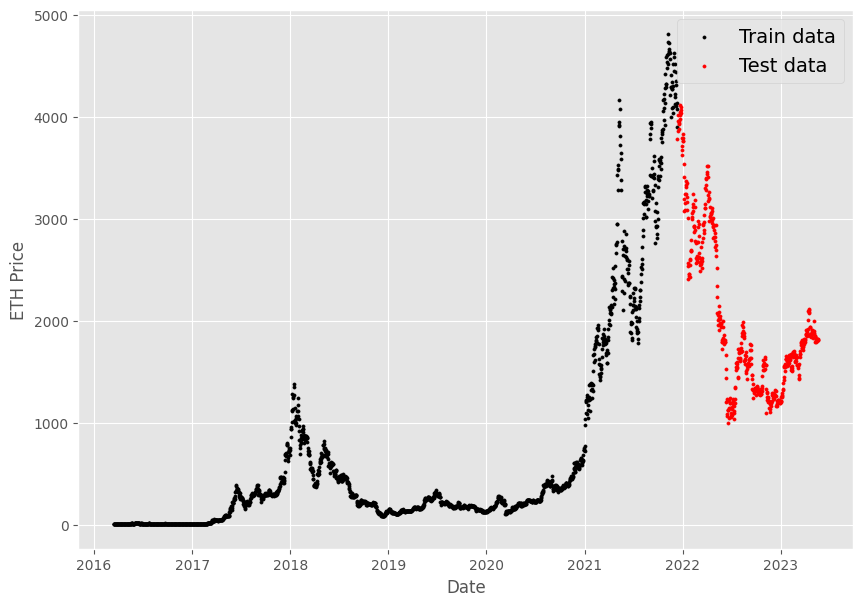

In [13]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5,c="black", label="Train data")
plt.scatter(X_test, y_test, s=5,c="red", label="Test data")
plt.xlabel("Date")
plt.ylabel("ETH Price")
plt.legend(fontsize=14)
plt.show();

In [14]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
    """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
    plt.style.use("ggplot")
    plt.plot(timesteps[start:end],values[start:end],format,label=label)
    plt.xlabel("Time")
    plt.ylabel("ETH Price")
    if label:
        plt.legend(fontsize=10)
    plt.grid(True)


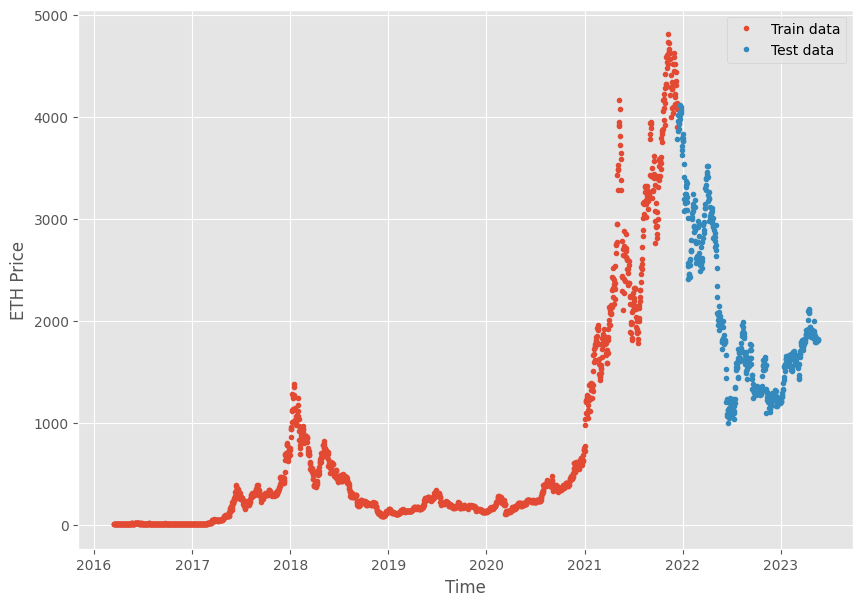

In [15]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")


In [16]:
y_test[:-1]

array([1814.13, 1819.68, 1812.32, 1800.99, 1821.73, 1823.98, 1817.11,
       1799.36, 1794.95, 1807.31, 1794.71, 1840.92, 1846.56, 1847.48,
       1870.99, 1896.48, 1993.33, 1877.06, 1904.74, 1869.74, 1830.75,
       1868.88, 1907.8 , 1891.14, 1908.81, 1866.05, 1865.95, 1841.88,
       1862.05, 1873.95, 1849.81, 1942.72, 1935.97, 2103.34, 2074.74,
       2119.29, 2090.59, 2099.98, 2012.11, 1916.58, 1889.86, 1910.36,
       1858.9 , 1848.93, 1863.46, 1872.35, 1908.96, 1870.52, 1810.77,
       1795.01, 1820.78, 1821.62, 1793.59, 1793.27, 1772.63, 1714.65,
       1774.06, 1742.34, 1749.26, 1814.08, 1734.48, 1803.54, 1732.31,
       1779.47, 1758.7 , 1789.38, 1673.85, 1649.65, 1700.15, 1673.93,
       1580.24, 1471.15, 1426.75, 1438.5 , 1533.04, 1561.78, 1565.84,
       1564.37, 1566.73, 1568.89, 1647.38, 1666.09, 1604.69, 1633.66,
       1641.6 , 1594.66, 1608.24, 1650.52, 1643.39, 1659.41, 1703.27,
       1681.52, 1691.62, 1693.96, 1640.66, 1675.43, 1555.46, 1505.84,
       1515.44, 1538

In [17]:
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([1814.13, 1819.68, 1812.32, 1800.99, 1821.73, 1823.98, 1817.11,
        1799.36, 1794.95, 1807.31]),
 array([4110.14, 3979.54, 4016.59, 3938.8 , 3925.34, 3959.83, 3878.29,
        3956.62, 4019.24, 3861.55]))

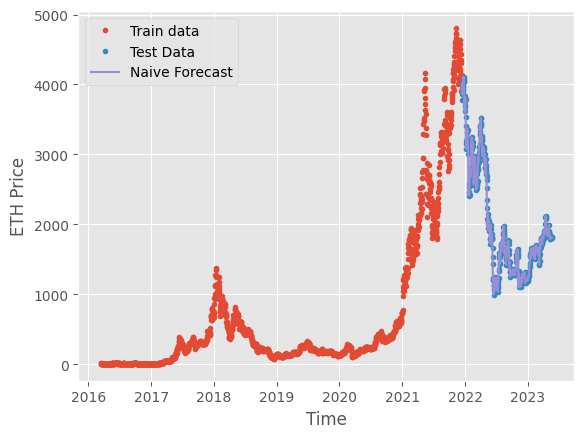

In [18]:
plt.style.use("ggplot")
plot_time_series(timesteps=X_train, values=y_train, label="Train data")

plot_time_series(timesteps=X_test,values=y_test,label="Test Data")
plot_time_series(timesteps=X_test[1:],values=naive_forecast,label="Naive Forecast",format="-")

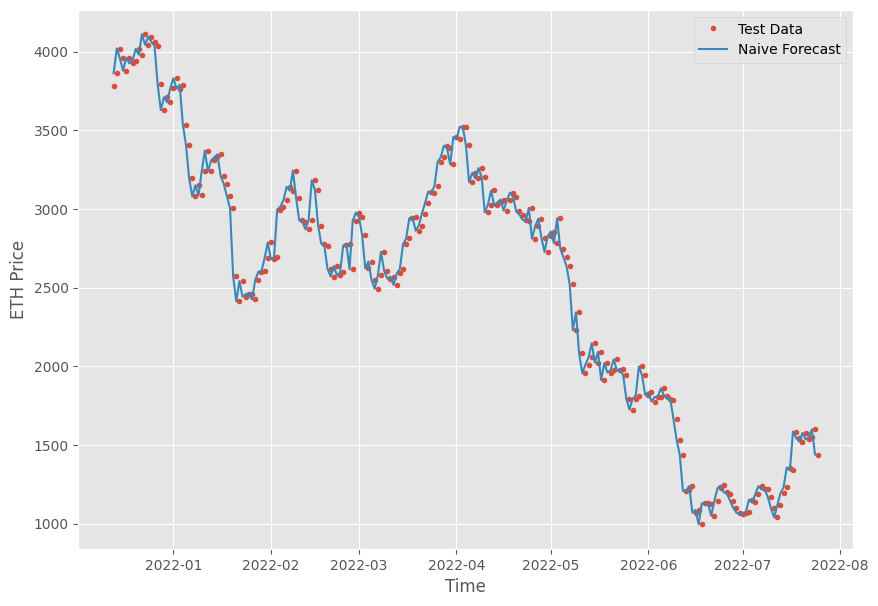

In [19]:
plt.figure(figsize=(10, 7))
offset = 300
plot_time_series(timesteps=X_test,values=y_test,label="Test Data",start=offset)
plot_time_series(timesteps=X_test[1:],values=naive_forecast,start=offset,label="Naive Forecast",format="-")


In [20]:
import tensorflow as tf

In [21]:
def mean_absolute_scaled_error(y_true,y_pred):
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_pred[:-1]))
    return mae / mae_naive_no_season

In [22]:
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}


In [23]:
import numpy as np
evaluate_preds(y_test[1:],naive_forecast)

{'mae': 56.656162,
 'mse': 6615.391,
 'rmse': 81.33506,
 'mape': 2.8879774,
 'mase': 0.71365756}

In [24]:
tf.reduce_mean(y_test).numpy()


1978.218152380952

In [25]:
HORIZON = 1
WINDOW_SIZE = 7

In [26]:
def get_labelled_windows(x,horizon=1):
    return x[:, :-horizon], x[:, -horizon:]

In [27]:
test_window, test_labels = get_labelled_windows(tf.expand_dims(tf.range(8)+1,axis=0),horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_labels).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [28]:
prices.dtype

dtype('float64')

In [29]:

def make_windows(x,window_size=7,horizon=1):
    """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
    window_step= np.expand_dims(np.arange(window_size+horizon),axis=0)
    window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T
    windowed_array = x[window_indexes]
    windows,labels = get_labelled_windows(windowed_array,horizon=HORIZON)
    return windows,labels

In [30]:
full_windows,full_labels = make_windows(prices)

In [31]:
full_windows[0],full_labels[0]

(array([1814.13, 1819.68, 1812.32, 1800.99, 1821.73, 1823.98, 1817.11]),
 array([1799.36]))

In [32]:
for i in range(5):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [1814.13 1819.68 1812.32 1800.99 1821.73 1823.98 1817.11] -> Label: [1799.36]
Window: [1819.68 1812.32 1800.99 1821.73 1823.98 1817.11 1799.36] -> Label: [1794.95]
Window: [1812.32 1800.99 1821.73 1823.98 1817.11 1799.36 1794.95] -> Label: [1807.31]
Window: [1800.99 1821.73 1823.98 1817.11 1799.36 1794.95 1807.31] -> Label: [1794.71]
Window: [1821.73 1823.98 1817.11 1799.36 1794.95 1807.31 1794.71] -> Label: [1840.92]


In [33]:
def make_train_test_split(windows,labels,test_size=0.2):
     """
    Splits matching pairs of windows and labels into train and test splits.
    returns:train_windows, test_windows, train_labels, test_labels
    """
     split_size = int(len(windows) * (1-test_size))
     train_windows = windows[:split_size]
     train_labels = labels[:split_size]
     test_windows = windows[split_size:]
     test_labels = labels[split_size:]
     return train_windows, test_windows, train_labels, test_labels


In [34]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)


In [35]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)


(2094, 524, 2094, 524)

In [36]:
train_windows[:5],train_labels[:5],test_labels[:5],test_windows[:5]

(array([[1814.13, 1819.68, 1812.32, 1800.99, 1821.73, 1823.98, 1817.11],
        [1819.68, 1812.32, 1800.99, 1821.73, 1823.98, 1817.11, 1799.36],
        [1812.32, 1800.99, 1821.73, 1823.98, 1817.11, 1799.36, 1794.95],
        [1800.99, 1821.73, 1823.98, 1817.11, 1799.36, 1794.95, 1807.31],
        [1821.73, 1823.98, 1817.11, 1799.36, 1794.95, 1807.31, 1794.71]]),
 array([[1799.36],
        [1794.95],
        [1807.31],
        [1794.71],
        [1840.92]]),
 array([[292.78],
        [292.  ],
        [299.  ],
        [301.34],
        [286.  ]]),
 array([[332.72, 328.7 , 325.62, 316.5 , 312.54, 322.24, 298.37],
        [328.7 , 325.62, 316.5 , 312.54, 322.24, 298.37, 292.78],
        [325.62, 316.5 , 312.54, 322.24, 298.37, 292.78, 292.  ],
        [316.5 , 312.54, 322.24, 298.37, 292.78, 292.  , 299.  ],
        [312.54, 322.24, 298.37, 292.78, 292.  , 299.  , 301.34]]))

In [45]:
import os
def make_checkpoint_callback(model_name,save_path="model_experience"):
    return tf.keras.callbacks.ModelCheckpoint(os.path.join(model_name,save_path),
                                              verbose=0,
                                              save_best_only=True)

In [48]:
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON,activation="linear")
],name="model_dense")

model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["mae"])


In [50]:
"""
with tf.device("/cpu:0"):
    model_1.fit(x=train_windows,
                y=train_labels,
                epochs=100,
                verbose=0,
                batch_size=128,
                validation_data=(test_windows, test_labels),
                callbacks=[make_checkpoint_callback(model_name=model_1.name)])
                """

'\nwith tf.device("/cpu:0"):\n    model_1.fit(x=train_windows,\n                y=train_labels,\n                epochs=100,\n                verbose=0,\n                batch_size=128,\n                validation_data=(test_windows, test_labels),\n                callbacks=[make_checkpoint_callback(model_name=model_1.name)])\n                '

In [51]:
model_1.evaluate(test_windows, test_labels)


17/17 [==============================] - 0s 11ms/step - loss: 4.1365 - mae: 4.1365


[4.136456489562988, 4.136456489562988]

In [37]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [53]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

17/17 [==============================] - 0s 2ms/step


(524,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([288.78568, 282.46808, 277.09778, 287.1413 , 293.958  , 281.84976,
        291.29272, 288.0336 , 302.7361 , 305.56512], dtype=float32)>)

In [54]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results


{'mae': 4.1364565,
 'mse': 89.715324,
 'rmse': 9.471817,
 'mape': 6.2138214,
 'mase': 0.81203353}

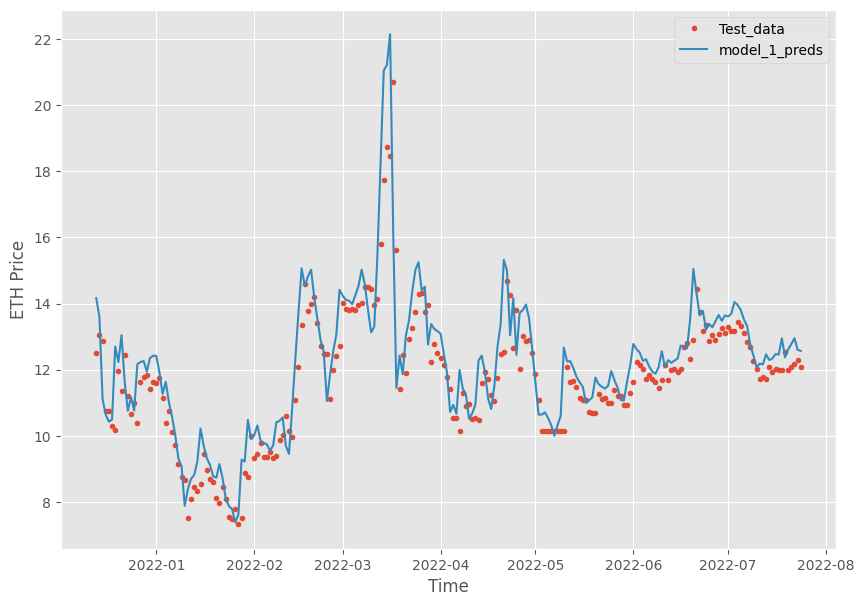

In [55]:
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")


In [56]:
#MODEL 2
HORIZON = 1
WINDOW_SIZE = 30

In [57]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2595, 2595)

In [58]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2076, 519, 2076, 519)

In [60]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.legacy.Adam())
"""
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[make_checkpoint_callback(model_name=model_2.name)])
"""

'\nmodel_2.fit(train_windows,\n            train_labels,\n            epochs=100,\n            batch_size=128,\n            verbose=1,\n            validation_data=(test_windows, test_labels),\n            callbacks=[make_checkpoint_callback(model_name=model_2.name)])\n'

In [61]:
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

17/17 [==============================] - 0s 2ms/step


In [62]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results


{'mae': 58.217876,
 'mse': 11985.14,
 'rmse': 109.47666,
 'mape': 100.93125,
 'mase': 1.0080351}

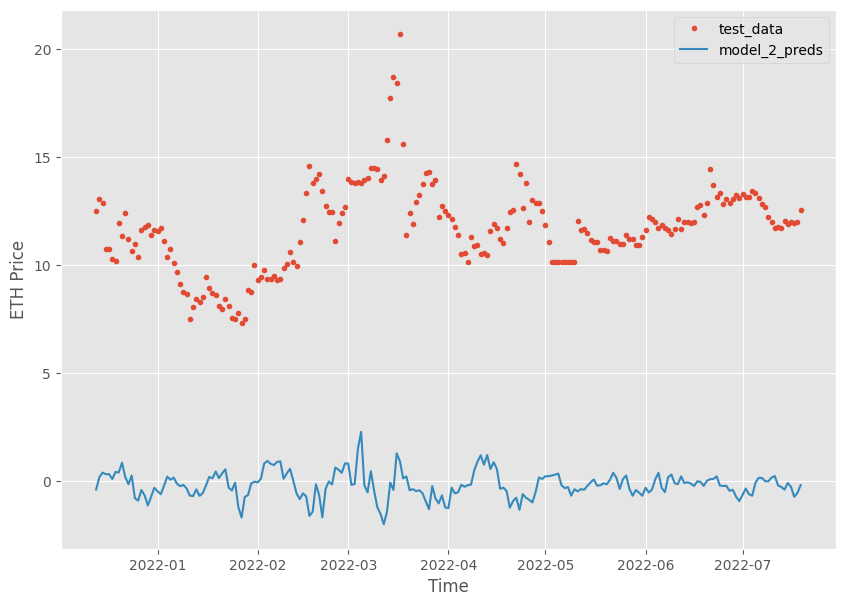

In [63]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")


In [64]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2589, 2589)

In [65]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2071, 518, 2071, 518)

In [68]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.legacy.Adam())
"""
model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[make_checkpoint_callback(model_name=model_3.name)])
"""

'\nmodel_3.fit(train_windows,\n            train_labels,\n            batch_size=128,\n            epochs=100,\n            verbose=1,\n            validation_data=(test_windows, test_labels),\n            callbacks=[make_checkpoint_callback(model_name=model_3.name)])\n'

In [69]:
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

17/17 [==============================] - 0s 6ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[ 292.46942 , -332.25098 ,  321.43497 ,  164.23022 ,  -24.046356,
         250.76038 ,  396.8123  ],
       [ 291.22336 , -331.7265  ,  315.39807 ,  171.6189  ,  -20.481468,
         239.45291 ,  398.98218 ],
       [ 330.51907 , -326.27484 ,  307.17502 ,  181.2654  ,  -19.498672,
         240.84988 ,  423.37933 ],
       [ 311.22958 , -309.48373 ,  312.82144 ,  190.53265 ,  -21.02607 ,
         266.82544 ,  395.4179  ],
       [ 304.4579  , -312.8436  ,  322.21558 ,  226.65216 ,  -22.172348,
         235.90665 ,  381.96378 ]], dtype=float32)>

In [70]:
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}


In [71]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 41.72549,
 'mse': 11241.342,
 'rmse': 58.79465,
 'mape': 68.434425,
 'mase': 0.993807}

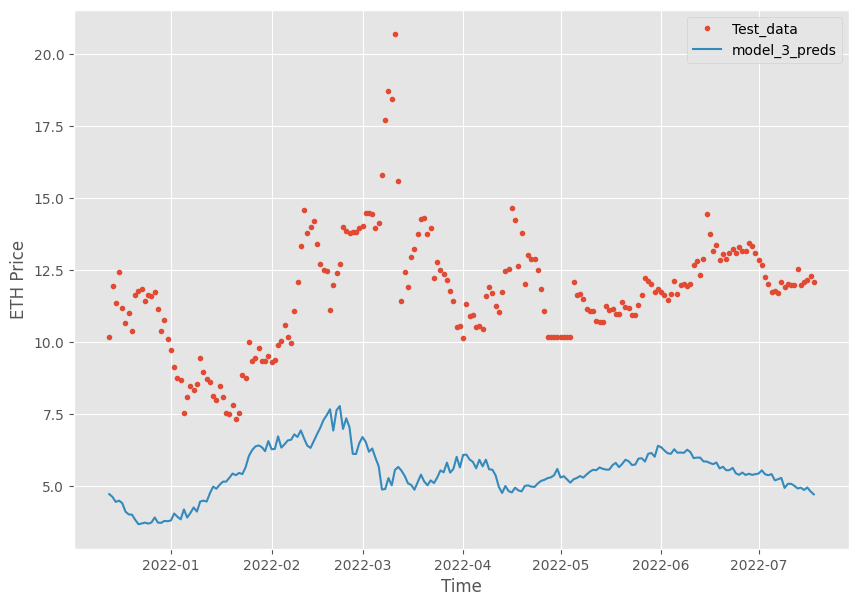

In [72]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 format="-",
                 start=offset,
                 label="model_3_preds")


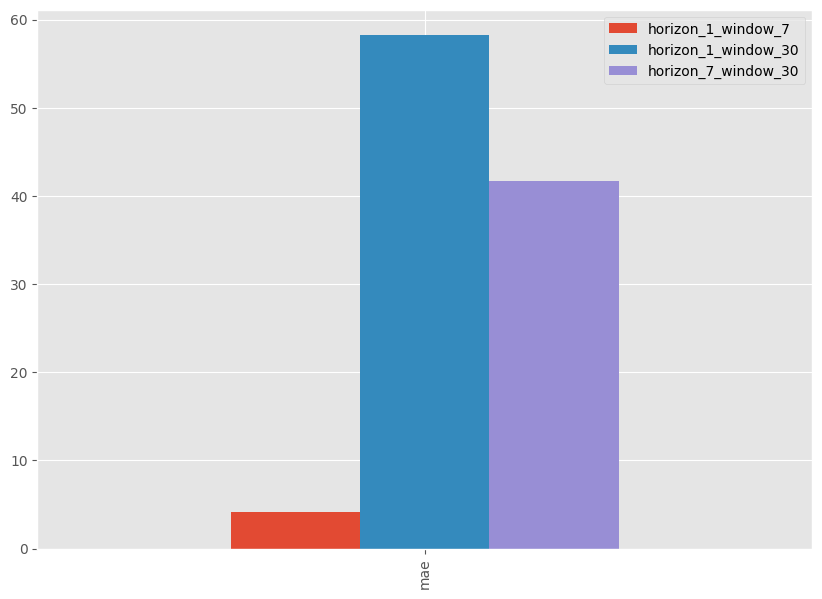

In [73]:
pd.DataFrame({"horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

In [74]:
HORIZON = 1
WINDOW_SIZE = 7

In [75]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2618, 2618)

In [76]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2094, 524, 2094, 524)

In [77]:
train_windows.shape

(2094, 7)

In [78]:
x = tf.constant(train_windows[0])
expand_dims_layer = tf.keras.layers.Lambda(lambda x:tf.expand_dims(x,axis=1))
print(f"Original shape: {x.shape}")
print(f"Expanded shape: {expand_dims_layer(x).shape}")
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[1814.13]
 [1819.68]
 [1812.32]
 [1800.99]
 [1821.73]
 [1823.98]
 [1817.11]]


In [85]:
with tf.device("/cpu:0"):
    tf.random.set_seed(42)
    model_4 = tf.keras.Sequential([
        layers.Lambda(lambda x:tf.expand_dims(x,axis=1)),
        layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
        layers.Dense(HORIZON)
    ],name="model_4_conv1d")

    model_4.compile(loss="mae",
                    optimizer=tf.keras.optimizers.legacy.Adam())
"""
    model_4.fit(x=train_windows,
                y=train_labels,
                batch_size=128,
                epochs=100,
                verbose=0,
                validation_data=(test_windows,test_labels),
                callbacks=make_checkpoint_callback(model_name=model_4.name))
                """

'\n    model_4.fit(x=train_windows,\n                y=train_labels,\n                batch_size=128,\n                epochs=100,\n                verbose=0,\n                validation_data=(test_windows,test_labels),\n                callbacks=make_checkpoint_callback(model_name=model_4.name))\n                '

In [80]:
model_4_preds = make_preds(model_4,test_windows)
model_4_preds[:10]

17/17 [==============================] - 1s 6ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([303.3509 , 294.67242, 290.94937, 297.9212 , 301.75977, 289.51694,
       296.79803, 297.25995, 307.2907 , 309.7111 ], dtype=float32)>

In [81]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results


{'mae': 3.8327508,
 'mse': 72.73726,
 'rmse': 8.528614,
 'mape': 7.5654926,
 'mase': 0.7370179}

In [86]:
tf.random.set_seed(42)
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x,axis=1)) (inputs)
x = layers.LSTM(128, activation="relu")(x)
outputs = layers.Dense(HORIZON) (x)
model_5 = tf.keras.Model(inputs,outputs,name="model_5_bilstm")
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.legacy.Adam())
"""
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            validation_data=(test_windows,test_labels),
            verbose=0,
            batch_size=128,
            callbacks=[make_checkpoint_callback(model_name=model_5.name)])
            """

'\nmodel_5.fit(train_windows,\n            train_labels,\n            epochs=100,\n            validation_data=(test_windows,test_labels),\n            verbose=0,\n            batch_size=128,\n            callbacks=[make_checkpoint_callback(model_name=model_5.name)])\n            '

In [87]:
model_5_preds = make_preds(model_5,test_windows)
model_5_preds[:10]

17/17 [==============================] - 0s 6ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-10.603878 , -10.940374 ,  -8.897839 , -12.22061  , -10.043148 ,
        -5.7741456,  -5.3428445,  -7.030246 ,  -9.757696 ,  -3.5825827],
      dtype=float32)>

In [88]:
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=test_labels)
model_5_results

{'mae': 79.757095,
 'mse': 17434.7,
 'rmse': 123.16587,
 'mape': 351.11865,
 'mase': 1.0030296}

In [43]:
import pandas as pd
blockrewardsizes = pd.read_excel("Book2.xlsx")

In [44]:
blockrewardsizes

,Block Reward,Start Date
0,5.0000,2015-07-30
1,4.0000,2017-12-11
2,3.2000,2020-04-17
3,2.5600,2022-04-25
4,2.0480,2024-02-19
5,1.6384,2026-04-12


In [45]:
blockrewardsizes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Block Reward  6 non-null      float64       
 1   Start Date    6 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 224.0 bytes


In [46]:
blockrewardsizes

,Block Reward,Start Date
0,5.0000,2015-07-30
1,4.0000,2017-12-11
2,3.2000,2020-04-17
3,2.5600,2022-04-25
4,2.0480,2024-02-19
5,1.6384,2026-04-12


In [47]:
import numpy as np
block_reward_1 = 5
block_reward_2 = 4
block_reward_3 = 3.2
block_reward_4 = 2.56

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2017-12-11")
block_reward_3_datetime = np.datetime64("2020-04-17")
block_reward_4_datetime = np.datetime64("2022-04-25")

In [48]:
block_reward_2_days = (block_reward_3_datetime-ethdata.index[-1]).days
block_reward_3_days = (block_reward_4_datetime-ethdata.index[-1]).days

In [49]:
block_reward_2_days,block_reward_3_days

(1495, 2233)

In [50]:
eth_prices_block = ethdata.copy()
eth_prices_block["Block Reward"] = None

In [51]:
eth_prices_block

,Price,Open,High,Low,Vol.,Change %,Currency,Block Reward
Date,,,,,,,,
2023-05-21,1814.13,1819.66,1827.47,1813.67,146.87K,-0.30,ETH,None
2023-05-20,1819.68,1812.32,1828.06,1807.08,134.46K,0.41,ETH,None
2023-05-19,1812.32,1800.95,1829.33,1796.99,253.50K,0.63,ETH,None
2023-05-18,1800.99,1822.12,1831.51,1774.77,311.24K,-1.14,ETH,None
2023-05-17,1821.73,1823.98,1834.44,1785.78,376.26K,-0.12,ETH,None
...,...,...,...,...,...,...,...,...
2016-03-18,10.74,11.09,11.20,8.34,157.37K,0.00,ETH,None
2016-03-17,10.74,12.58,12.61,10.44,89.45K,-16.61,ETH,None
2016-03-16,12.88,13.06,13.89,12.62,19.24K,-1.38,ETH,None


In [52]:
eth_prices_block['row_number'] = range(1, 2626)
eth_prices_block

,Price,Open,High,Low,Vol.,Change %,Currency,Block Reward,row_number
Date,,,,,,,,,
2023-05-21,1814.13,1819.66,1827.47,1813.67,146.87K,-0.30,ETH,None,1
2023-05-20,1819.68,1812.32,1828.06,1807.08,134.46K,0.41,ETH,None,2
2023-05-19,1812.32,1800.95,1829.33,1796.99,253.50K,0.63,ETH,None,3
2023-05-18,1800.99,1822.12,1831.51,1774.77,311.24K,-1.14,ETH,None,4
2023-05-17,1821.73,1823.98,1834.44,1785.78,376.26K,-0.12,ETH,None,5
...,...,...,...,...,...,...,...,...,...
2016-03-18,10.74,11.09,11.20,8.34,157.37K,0.00,ETH,None,2621
2016-03-17,10.74,12.58,12.61,10.44,89.45K,-16.61,ETH,None,2622
2016-03-16,12.88,13.06,13.89,12.62,19.24K,-1.38,ETH,None,2623


In [53]:
eth_prices_block = eth_prices_block.sort_values('row_number',ascending=False)
eth_prices_block

,Price,Open,High,Low,Vol.,Change %,Currency,Block Reward,row_number
Date,,,,,,,,,
2016-03-14,12.50,15.07,15.07,11.40,92.18K,-17.05,ETH,None,2625
2016-03-15,13.06,12.63,13.42,11.98,39.73K,4.48,ETH,None,2624
2016-03-16,12.88,13.06,13.89,12.62,19.24K,-1.38,ETH,None,2623
2016-03-17,10.74,12.58,12.61,10.44,89.45K,-16.61,ETH,None,2622
2016-03-18,10.74,11.09,11.20,8.34,157.37K,0.00,ETH,None,2621
...,...,...,...,...,...,...,...,...,...
2023-05-17,1821.73,1823.98,1834.44,1785.78,376.26K,-0.12,ETH,None,5
2023-05-18,1800.99,1822.12,1831.51,1774.77,311.24K,-1.14,ETH,None,4
2023-05-19,1812.32,1800.95,1829.33,1796.99,253.50K,0.63,ETH,None,3


In [54]:
eth_prices_block

,Price,Open,High,Low,Vol.,Change %,Currency,Block Reward,row_number
Date,,,,,,,,,
2016-03-14,12.50,15.07,15.07,11.40,92.18K,-17.05,ETH,None,2625
2016-03-15,13.06,12.63,13.42,11.98,39.73K,4.48,ETH,None,2624
2016-03-16,12.88,13.06,13.89,12.62,19.24K,-1.38,ETH,None,2623
2016-03-17,10.74,12.58,12.61,10.44,89.45K,-16.61,ETH,None,2622
2016-03-18,10.74,11.09,11.20,8.34,157.37K,0.00,ETH,None,2621
...,...,...,...,...,...,...,...,...,...
2023-05-17,1821.73,1823.98,1834.44,1785.78,376.26K,-0.12,ETH,None,5
2023-05-18,1800.99,1822.12,1831.51,1774.77,311.24K,-1.14,ETH,None,4
2023-05-19,1812.32,1800.95,1829.33,1796.99,253.50K,0.63,ETH,None,3


In [55]:
eth_prices_block.iloc[:block_reward_2_days,-2] = block_reward_2
eth_prices_block.iloc[block_reward_2_days:block_reward_3_days,-2] = block_reward_3
eth_prices_block.iloc[block_reward_3_days:,-2] = block_reward_4
eth_prices_block = eth_prices_block.drop("row_number",axis=1)
eth_prices_block

,Price,Open,High,Low,Vol.,Change %,Currency,Block Reward
Date,,,,,,,,
2016-03-14,12.50,15.07,15.07,11.40,92.18K,-17.05,ETH,4
2016-03-15,13.06,12.63,13.42,11.98,39.73K,4.48,ETH,4
2016-03-16,12.88,13.06,13.89,12.62,19.24K,-1.38,ETH,4
2016-03-17,10.74,12.58,12.61,10.44,89.45K,-16.61,ETH,4
2016-03-18,10.74,11.09,11.20,8.34,157.37K,0.00,ETH,4
...,...,...,...,...,...,...,...,...
2023-05-17,1821.73,1823.98,1834.44,1785.78,376.26K,-0.12,ETH,2.56
2023-05-18,1800.99,1822.12,1831.51,1774.77,311.24K,-1.14,ETH,2.56
2023-05-19,1812.32,1800.95,1829.33,1796.99,253.50K,0.63,ETH,2.56


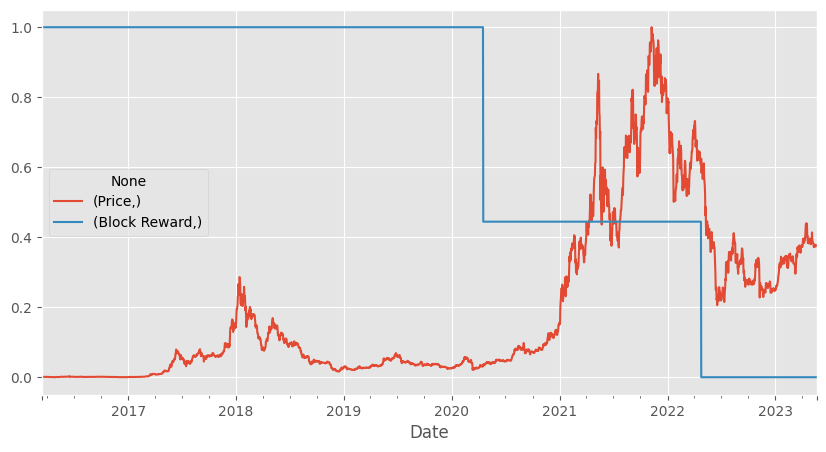

In [56]:
from sklearn.preprocessing import minmax_scale
scaled_values = minmax_scale(eth_prices_block[["Price","Block Reward"]])
scaled_price_block_df = pd.DataFrame(scaled_values,
                                      columns=[["Price","Block Reward"]],
                                     index=eth_prices_block.index)
scaled_price_block_df.plot(figsize=(10,5));

In [57]:
HORIZON = 1
WINDOW_SIZE = 7

In [58]:
eth_prices_windowed = eth_prices_block.copy()
for i in range(WINDOW_SIZE):
    eth_prices_windowed[f'Price+{i+1}'] = eth_prices_windowed["Price"].shift(periods=i+1)
eth_prices_windowed

,Price,Open,High,Low,Vol.,Change %,Currency,Block Reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,,,,,,,
2016-03-14,12.50,15.07,15.07,11.40,92.18K,-17.05,ETH,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-15,13.06,12.63,13.42,11.98,39.73K,4.48,ETH,4,12.50,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-16,12.88,13.06,13.89,12.62,19.24K,-1.38,ETH,4,13.06,12.50,NaN,NaN,NaN,NaN,NaN
2016-03-17,10.74,12.58,12.61,10.44,89.45K,-16.61,ETH,4,12.88,13.06,12.50,NaN,NaN,NaN,NaN
2016-03-18,10.74,11.09,11.20,8.34,157.37K,0.00,ETH,4,10.74,12.88,13.06,12.50,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-17,1821.73,1823.98,1834.44,1785.78,376.26K,-0.12,ETH,2.56,1823.98,1817.11,1799.36,1794.95,1807.31,1794.71,1840.92
2023-05-18,1800.99,1822.12,1831.51,1774.77,311.24K,-1.14,ETH,2.56,1821.73,1823.98,1817.11,1799.36,1794.95,1807.31,1794.71
2023-05-19,1812.32,1800.95,1829.33,1796.99,253.50K,0.63,ETH,2.56,1800.99,1821.73,1823.98,1817.11,1799.36,1794.95,1807.31


In [59]:
X = eth_prices_windowed.dropna()[["Price+1","Price+2","Price+3","Price+4","Price+5","Price+6","Price+7"]].astype(np.float32)
y = eth_prices_windowed.dropna()["Price"].astype(np.float32)
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2618 entries, 2016-03-21 to 2023-05-21
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Price+1  2618 non-null   float32
 1   Price+2  2618 non-null   float32
 2   Price+3  2618 non-null   float32
 3   Price+4  2618 non-null   float32
 4   Price+5  2618 non-null   float32
 5   Price+6  2618 non-null   float32
 6   Price+7  2618 non-null   float32
dtypes: float32(7)
memory usage: 92.0 KB


In [60]:
y.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 2618 entries, 2016-03-21 to 2023-05-21
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
2618 non-null   float32
dtypes: float32(1)
memory usage: 30.7 KB


In [108]:
y[0],X.iloc[0]

(11.95,
 Price+1    10.18
 Price+2    10.31
 Price+3    10.74
 Price+4    10.74
 Price+5    12.88
 Price+6    13.06
 Price+7    12.50
 Name: 2016-03-21 00:00:00, dtype: float32)

In [61]:
split_size = int(0.8*len(y))
X_train,y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)


(2094, 2094, 524, 524)

In [112]:
import tensorflow as tf
from tensorflow.keras import layers
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)

],name="model_6_mv_dense")

model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.legacy.Adam())
"""
with tf.device("/cpu:0"):
    model_6.fit(X_train,
                y_train,
                validation_data=(X_test,y_test),
                epochs=100,
                verbose=0,
                batch_size=128,
                callbacks=[make_checkpoint_callback(model_name=model_6.name)])
                """

'\nwith tf.device("/cpu:0"):\n    model_6.fit(X_train,\n                y_train,\n                validation_data=(X_test,y_test),\n                epochs=100,\n                verbose=0,\n                batch_size=128,\n                callbacks=[make_checkpoint_callback(model_name=model_6.name)])\n                '

In [113]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

17/17 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-1479.5796, -1438.8713, -1416.4218, -1466.7981, -1449.6823,
       -1494.0698, -1470.0435, -1447.0342, -1459.9922, -1513.8226],
      dtype=float32)>

In [114]:
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results


{'mae': 2711.3853,
 'mse': 8445892.0,
 'rmse': 2906.182,
 'mape': 137.30637,
 'mase': 1.0012851}

In [63]:
class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self,
                 input_size:int,
                 theta_size:int,
                 horizon:int,
                 n_neurons:int,
                 n_layers:int,
                 **kwargs):
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons=n_neurons
        self.n_layers = n_layers

        self.hidden = [tf.keras.layers.Dense(n_neurons,activation="relu") for _ in range(n_layers)]
        self.theta_layer = tf.keras.layers.Dense(theta_size,activation="linear",name="theta")
    def call(self,inputs):
        x=inputs
        for layer in self.hidden:
            x = layer(x)
        theta = self.theta_layer(x)
        backast,forecast = theta[:,:self.input_size], theta[:, -self.horizon:]
        return backast,forecast

In [64]:
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size =WINDOW_SIZE+HORIZON,
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [65]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1,axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [66]:
backcast,forecast = dummy_nbeats_block_layer(dummy_inputs)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.1283102   0.16104195  0.9631247  -0.84152114  0.5548123   0.46221
  1.0540502 ]
Forecast: -0.3244193196296692


In [67]:
HORIZON = 1
WINDOW_SIZE = 7

In [68]:
ethdata.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'Currency'], dtype='object')

In [69]:
eth_data_nbeats = eth_prices_windowed.copy()
eth_data_nbeats=eth_data_nbeats.drop("Block Reward",axis=1)
for i in range(WINDOW_SIZE):
    eth_data_nbeats[f"Price+{i+1}"] = ethdata["Price"].shift(periods=i+1)
ethdata_nbeats = eth_data_nbeats.drop(columns=["Open","High","Low","Vol.","Change %","Currency"])
eth_data_nbeats = ethdata_nbeats.dropna()
eth_data_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2016-03-14,12.50,13.06,12.88,10.74,10.74,10.31,10.18,11.95
2016-03-15,13.06,12.88,10.74,10.74,10.31,10.18,11.95,11.37
2016-03-16,12.88,10.74,10.74,10.31,10.18,11.95,11.37,12.43
2016-03-17,10.74,10.74,10.31,10.18,11.95,11.37,12.43,11.20
2016-03-18,10.74,10.31,10.18,11.95,11.37,12.43,11.20,10.67


In [70]:
X = eth_data_nbeats.drop("Price",axis=1)
y = eth_data_nbeats["Price"]

split_size = int(len(X) * 0.8)

X_train, y_train = pd.DataFrame(X[:split_size]), pd.Series(y[:split_size])
X_test, y_test = pd.DataFrame(X[split_size:]), pd.Series(y[split_size:])

len(X_train), len(y_train), len(X_test), len(y_test)


(2094, 2094, 524, 524)

In [71]:
X_train.values.shape

(2094, 7)

In [72]:
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)

In [73]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

train_dataset = tf.data.Dataset.zip((train_features_dataset,train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset,test_labels_dataset))

BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
train_dataset,test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>)

In [74]:
# Setting hyperparameters for N-BEATS ALGORITHM
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [75]:
from tensorflow.keras import layers
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

subtracted = layers.subtract([tensor_1,tensor_2])

added = layers.add([tensor_1,tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")


Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [76]:
%%time
n_beats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                  theta_size=THETA_SIZE,
                                  horizon=HORIZON,
                                  n_neurons=N_NEURONS,
                                  n_layers=N_LAYERS,
                                  name="InitialBlock"
                                   )

stack_input = layers.Input(shape=(INPUT_SIZE),name="stack_input")

backast, forecast = n_beats_block_layer(stack_input)

residuals = layers.subtract([stack_input,backast],name=f"subtract_00")

for i,_ in enumerate(range(N_STACKS-1)):

    backcast, block_forecast = NBeatsBlock(
        input_size=INPUT_SIZE,
        theta_size=THETA_SIZE,
        horizon=HORIZON,
        n_neurons=N_NEURONS,
        n_layers=N_LAYERS,
        name=f"NBeatsBlock_{i}"
         )(residuals)

    residuals = layers.subtract([residuals,backast],name=f"subtract_{i}")
    forecast = layers.add([forecast,block_forecast],name=f"add_{i}")

model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_n_beats")


CPU times: user 824 ms, sys: 92.1 ms, total: 916 ms
Wall time: 1.1 s


In [ ]:
%%time
with tf.device("/cpu:0"):
    model_7_history = model_7.fit(train_dataset,
                                  epochs=N_EPOCHS,
                                  validation_data=test_dataset,
                                  verbose=0,
                                  # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
                                  callbacks=
                                  [tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=200,restore_best_weights=True),
                                   tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",patience=100,verbose=1)]
                              )

In [77]:
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                metrics=["mae","mse"])

In [133]:
model_7_preds = make_preds(model_7,test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 610ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-20839.799, -19385.404, -11511.043, -12865.146, -17471.59 ,
       -12088.363, -10986.406, -13971.051, -13181.891, -10062.197],
      dtype=float32)>

In [134]:
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 9028.995,
 'mse': 104826810.0,
 'rmse': 10238.496,
 'mape': 440.6363,
 'mase': 1.0002776}

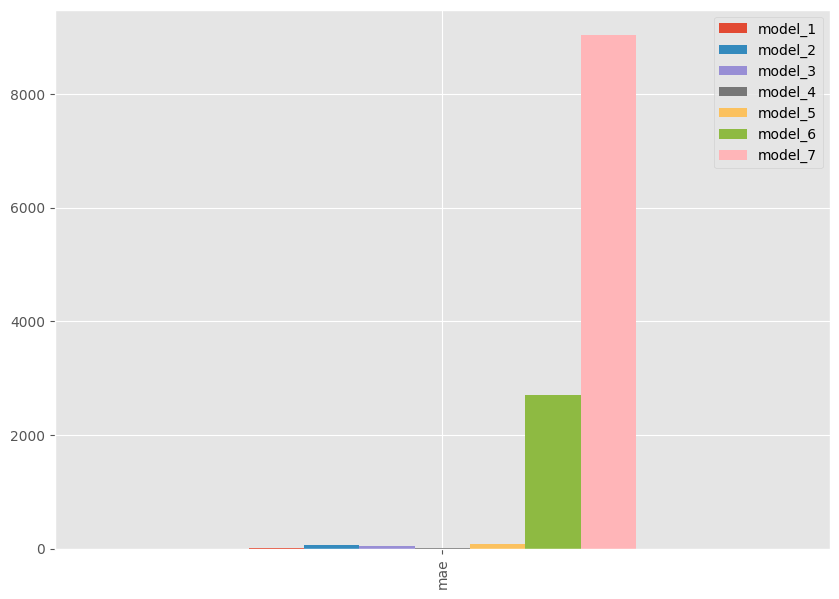

In [94]:
# Comparison of MAE(Mean Absolute Error of 7 different models)
pd.DataFrame({"model_1": model_1_results["mae"],
              "model_2": model_2_results["mae"],
              "model_3": model_3_results["mae"],
              "model_4": model_4_results["mae"],
              "model_5": model_5_results["mae"],
              "model_6": model_6_results["mae"],
              "model_7": model_7_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");